<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2023-24

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/pa-legg/sdav2023

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 11th JANUARY @ 14:00**. 

In [1]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.patches as mpatches

def load_csv_data():
    data = pd.read_csv('./part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

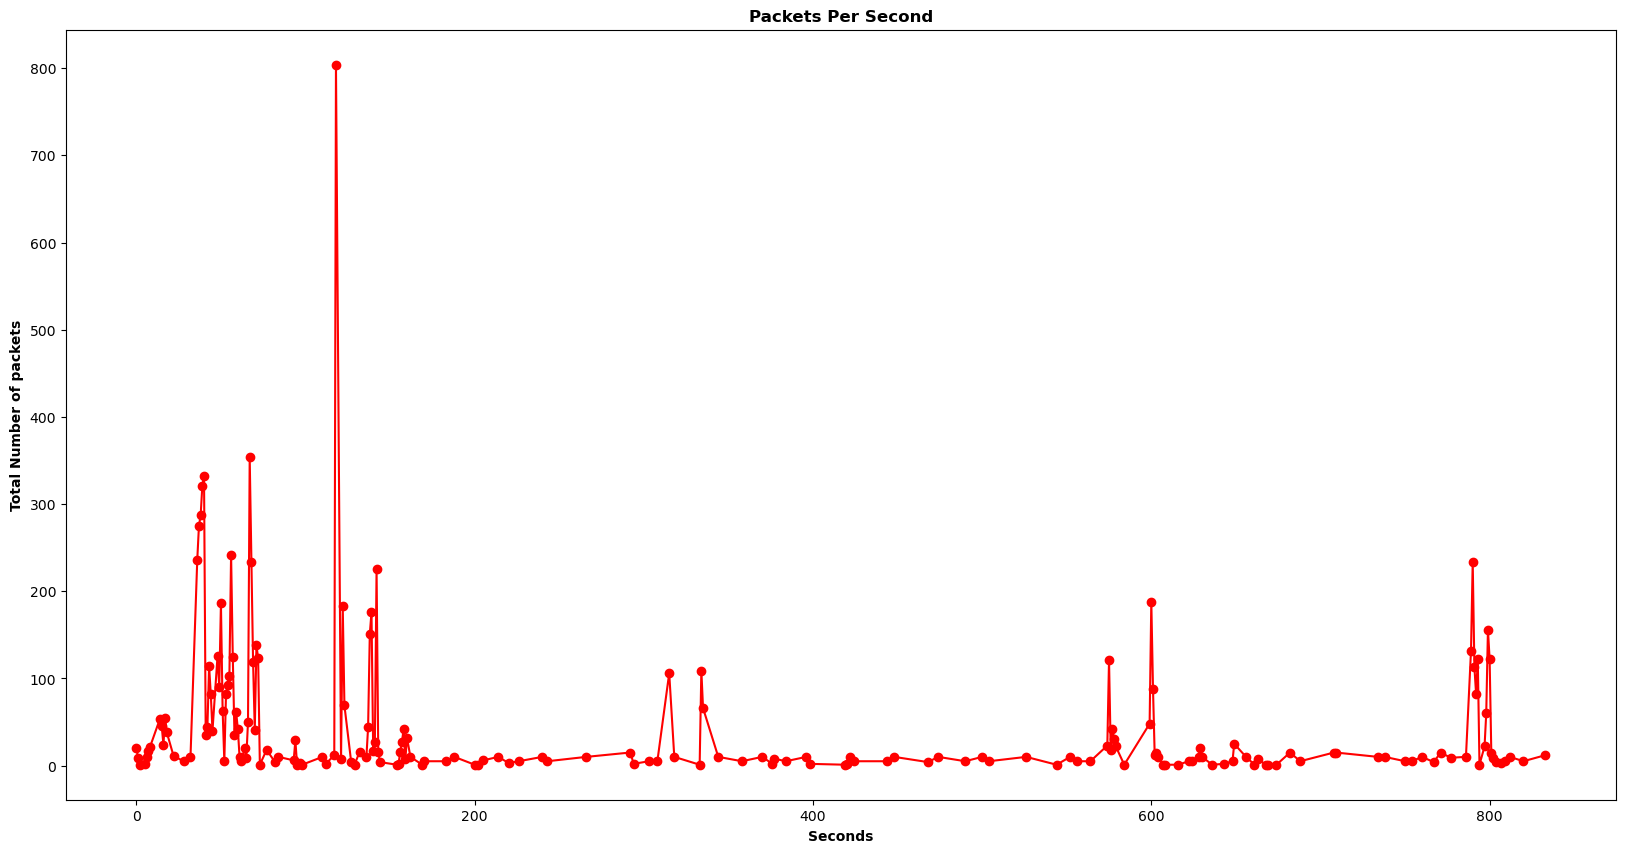

In [2]:
# ANSWER
plt.figure(figsize=(20,10))
######### ADD YOUR CODE HERE ##########

data['Seconds'] = data['Time'].astype(int) 

packets = data.groupby('Seconds').size()

plt.plot(packets.index,packets.values, marker='o', linestyle='-', color='red')
plt.xlabel('Seconds', fontweight='bold')
plt.ylabel('Total Number of packets', fontweight='bold')
plt.title('Packets Per Second', fontweight='bold')
plt.show()

### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

/var/folders/zt/8c69w12x1g5dnmhtf5rr7n240000gn/T/ipykernel_50470/3145458974.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  protocol_cv = pd.value_counts(data['Protocol'])


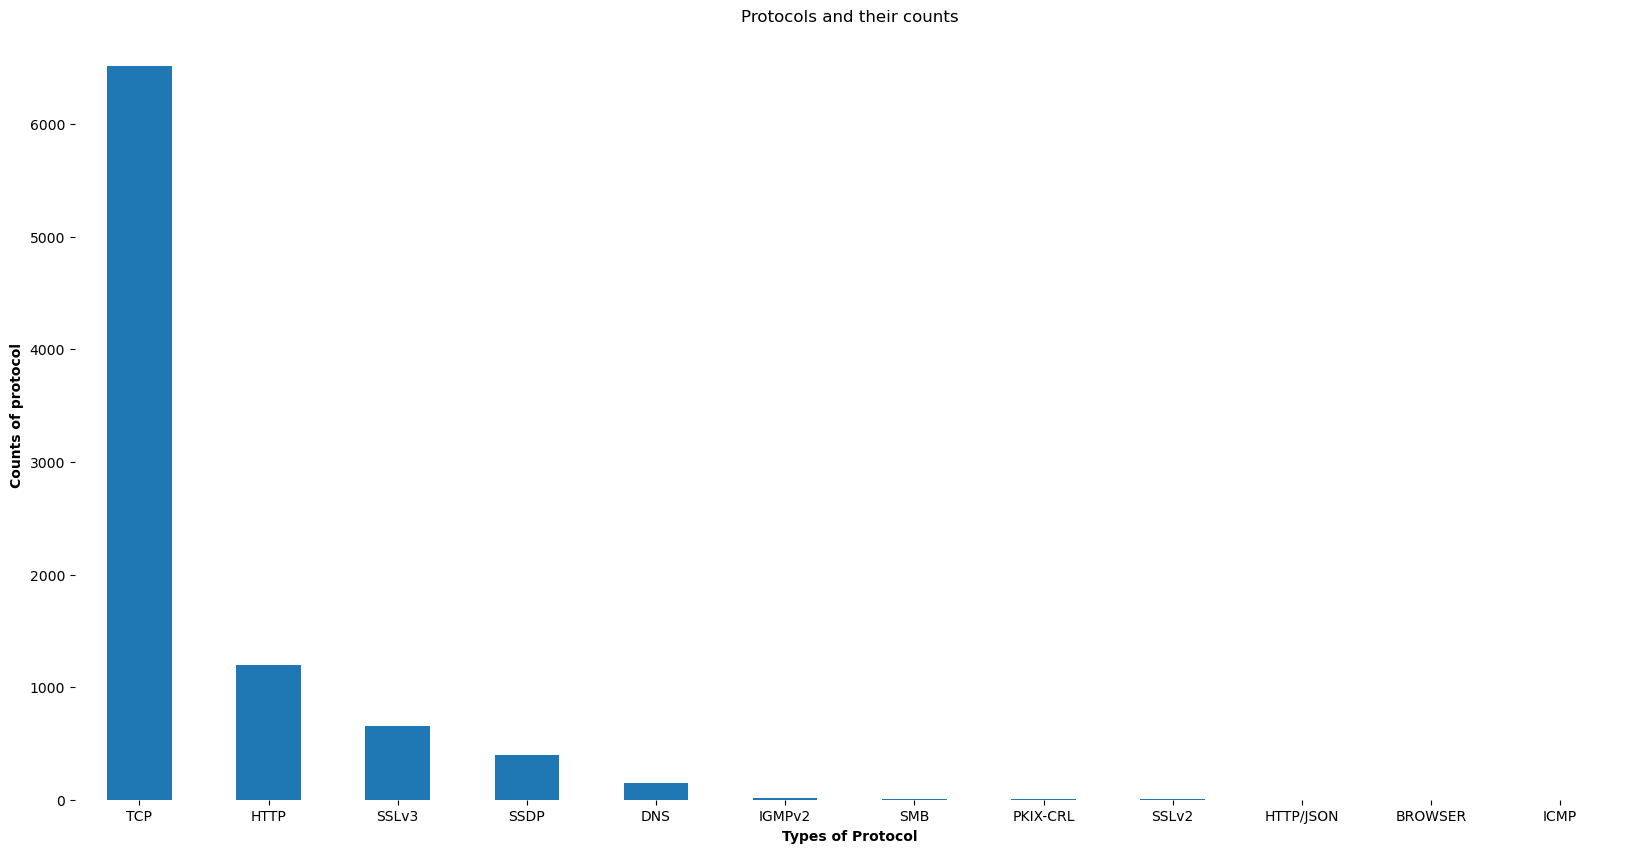

In [3]:
# ANSWER
######### ADD YOUR CODE HERE ##########
protocol_cv = pd.value_counts(data['Protocol'])

plt.axes(frameon=0)
protocol_cv.plot(kind='bar', rot=0, title='Protocols and their counts', figsize=(20,10)).grid(False)
plt.xlabel('Types of Protocol', fontweight='bold')
plt.ylabel('Counts of protocol', fontweight='bold')
plt.show()

### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

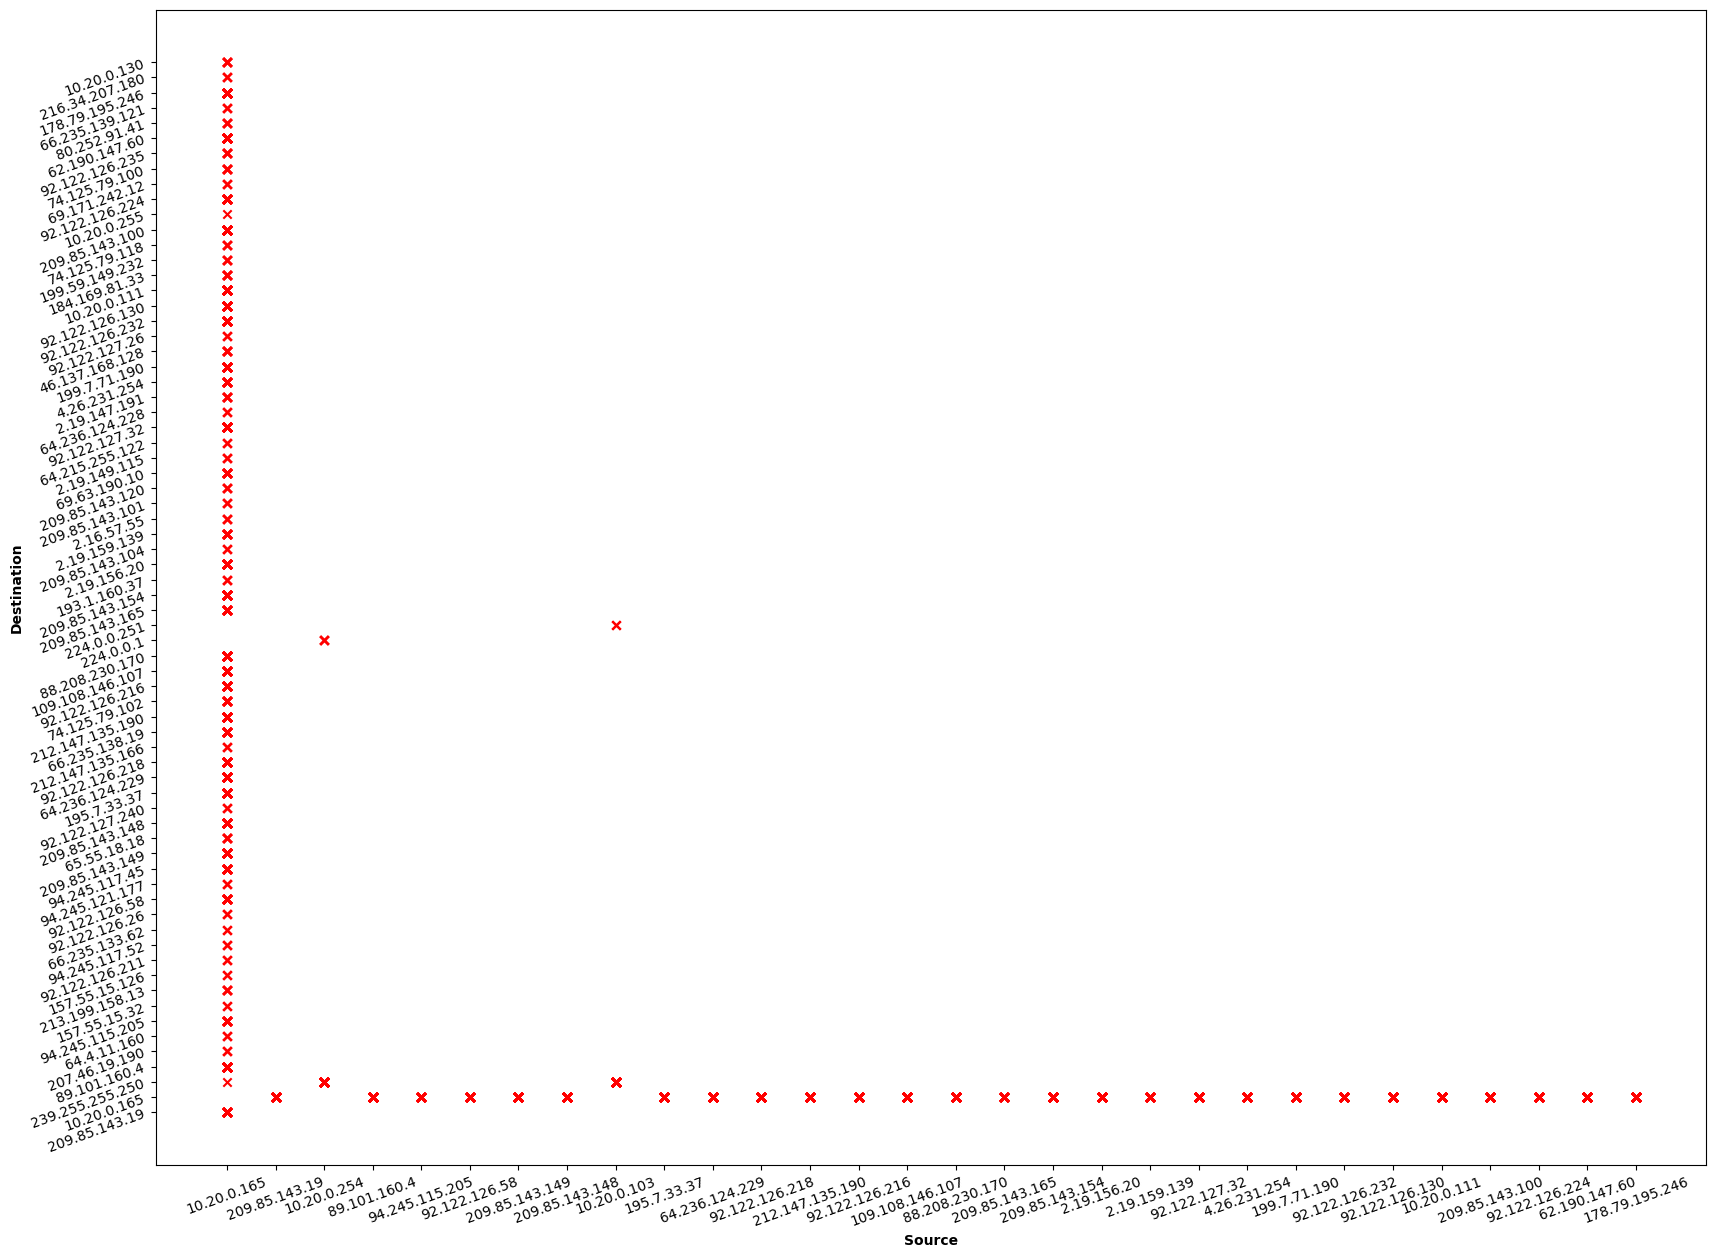

In [4]:
# ANSWER
plt.figure(figsize=(20,15))
plt.xticks(rotation=20)
plt.yticks(rotation=20)
######### ADD YOUR CODE HERE ##########
plt.scatter(data['Source'], data['Destination'], color='r', marker='x')
plt.xlabel('Source', fontweight='bold')
plt.ylabel('Destination', fontweight='bold')
plt.show()

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

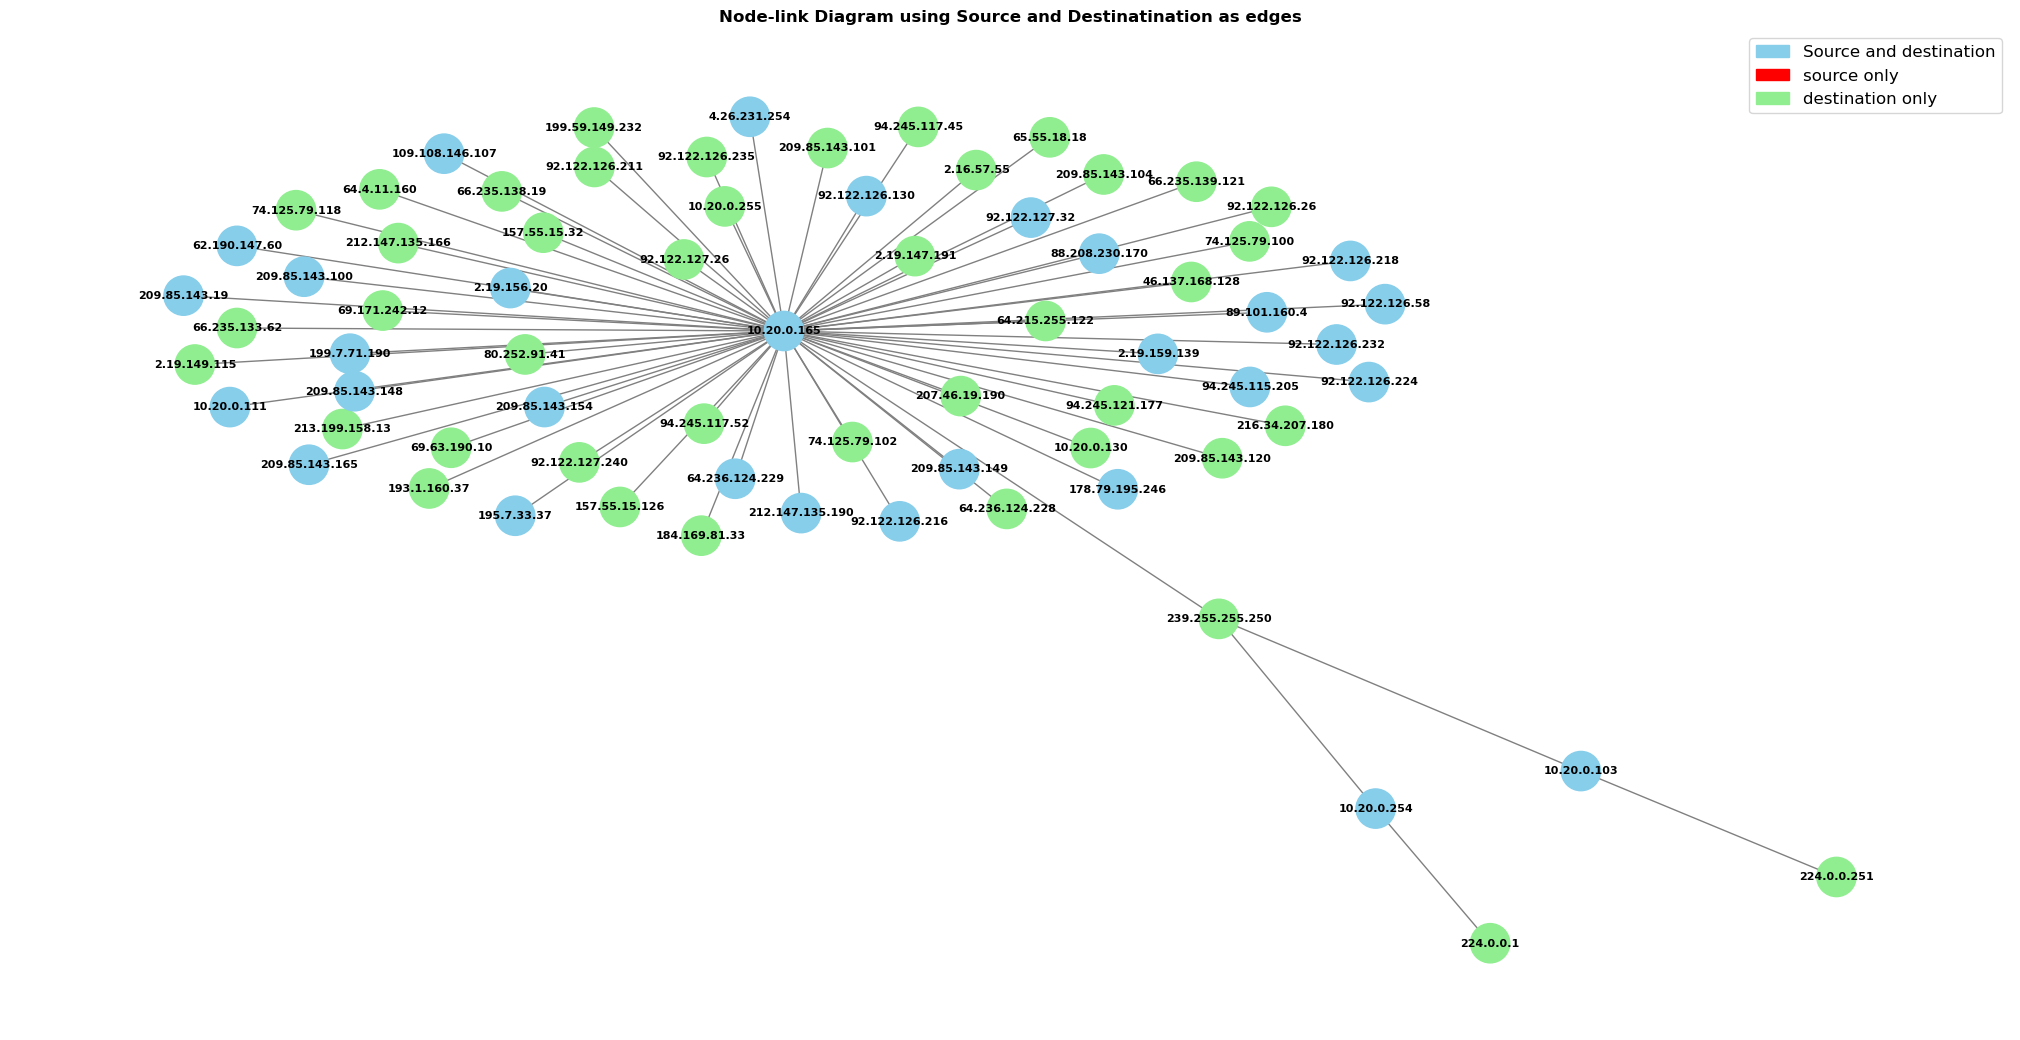

In [5]:
# ANSWER
######### ADD YOUR CODE HERE ##########
G = nx.from_pandas_edgelist(data, source='Source', target='Destination')

sources = set(data['Source'])
destinations = set(data['Destination'])

node_colour = []
for node in G.nodes():
    if node in sources and destinations:
        node_colour.append('skyblue')
    elif node in sources:
        node_colour.append('red')
    elif node in destinations:
        node_colour.append('lightgreen')
    else:
        None
    

plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True, node_size=800, node_color=node_colour, font_size=8, font_weight='bold', edge_color='grey')
plt.title('Node-link Diagram using Source and Destinatination as edges', fontweight='bold')
source_and_destination_patch = mpatches.Patch(color='skyblue', label='Source and destination')
source_patch = mpatches.Patch(color='red', label='source only')
destination_patch = mpatches.Patch(color='lightgreen', label='destination only')
neither = mpatches.Patch(color='grey', label='Neither')
plt.legend(handles=[source_and_destination_patch, source_patch, destination_patch], loc='upper right', fontsize=12)
plt.show()

### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [6]:
######### ADD YOUR CODE HERE ##########
# print(data.groupby('Protocol').size())
data['BROWSER'] = data['Protocol'].apply(lambda x: True if x in ['BROWSER'] else False)
data['DNS'] = data['Protocol'].apply(lambda x: True if x in ['DNS'] else False)
data['HTTP'] = data['Protocol'].apply(lambda x: True if x in ['HTTP'] else False)
data['HTTP/JSON'] = data['Protocol'].apply(lambda x: True if x in ['HTTP/JSON'] else False)
data['ICMP'] = data['Protocol'].apply(lambda x: True if x in ['ICMP'] else False)
data['IGMPv2'] = data['Protocol'].apply(lambda x: True if x in ['IGMPv2'] else False)
data['PKIX-CRL'] = data['Protocol'].apply(lambda x: True if x in ['PKIX-CRL'] else False)
data['SMB'] = data['Protocol'].apply(lambda x: True if x in ['SMB'] else False)
data['SSDP'] = data['Protocol'].apply(lambda x: True if x in ['SSDP'] else False)
data['SSLv2'] = data['Protocol'].apply(lambda x: True if x in ['SSLv2'] else False)
data['SSLv3'] = data['Protocol'].apply(lambda x: True if x in ['SSLv3'] else False)
data['TCP'] = data['Protocol'].apply(lambda x: True if x in ['TCP'] else False)

# data = data.drop(columns=['Seconds'])
data


,Time,Source,Destination,Protocol,Length,Info,Seconds,BROWSER,DNS,HTTP,HTTP/JSON,ICMP,IGMPv2,PKIX-CRL,SMB,SSDP,SSLv2,SSLv3,TCP
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,0,False,False,False,False,False,False,False,False,False,False,False,True
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",0,False,False,False,False,False,False,False,False,False,False,False,True
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,0,False,False,False,False,False,False,False,False,False,False,False,True
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,0,False,False,False,False,False,False,False,False,False,False,True,False
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,0,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID...",833,False,False,False,False,False,False,False,True,False,False,False,False
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:",833,False,False,False,False,False,False,False,True,False,False,False,False
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra...",833,False,False,False,False,False,False,False,True,False,False,False,False
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA...",833,False,False,False,False,False,False,False,True,False,False,False,False


### Question 6: Show a Multi-Line Chart that shows the Total Number of Packets Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol.

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

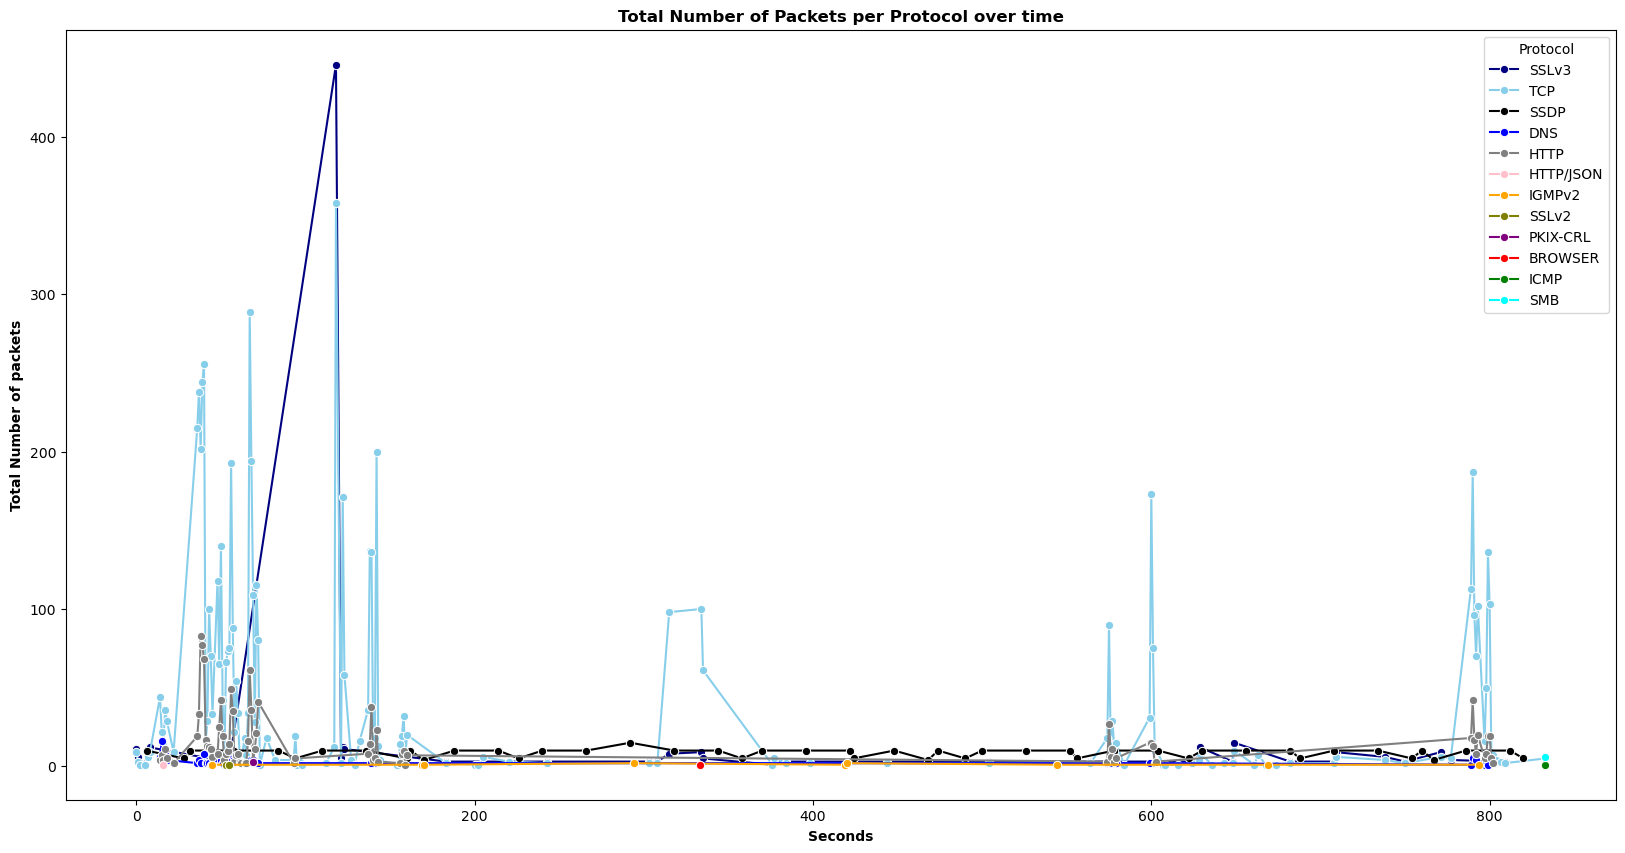

In [7]:
# ANSWER
######### ADD YOUR CODE HERE ##########
packets_per_protocol = data.groupby(['Seconds', 'Protocol']).size().reset_index(name='PacketCount')

colours = {
    'BROWSER' : 'red',
    'DNS' : 'blue',
    'HTTP'	: 'grey',
    'HTTP/JSON'	: 'pink',
    'ICMP' : 'green',
    'IGMPv2' : 'orange',
    'PKIX-CRL' : 'purple',
    'SMB' : 'cyan',
    'SSDP' : 'black',
    'SSLv2' : 'olive',
    'SSLv3' : 'navy',
    'TCP' : 'skyblue'
}

plt.figure(figsize=(20,10))
sns.lineplot(data=packets_per_protocol, x='Seconds', y='PacketCount', hue='Protocol', palette=colours, marker='o')

plt.xlabel('Seconds', fontweight='bold')
plt.ylabel('Total Number of packets', fontweight='bold')
plt.title('Total Number of Packets per Protocol over time', fontweight='bold')
plt.show()


### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

- line chart shows the total number of packets sent over time revealing traffic spikes such as nearly 800 packets sent around 118th second. This could help identify any DoS attack.
- Bar chart shows TCP, HTTP, SSLv3 are most used and HTTP/JSON, BROWSER, ICMP are least used protocol types. This can be used to see if there is an unexpected rise in less common protocols in the network by forecasting.
- scatter chart shows that '10.20.0.165' IP address has sent packets to almost every other IP addresses. This could help identify unsual activity such as large packets sent which could be an indication of data exfiltration.
- node link diagram gives same conclusions as the scatter chart. The colour of the nodes distingushes the IP addresses to source and destination which could help identify unauthorised connections and suspicious communication between unusual IP addresses.
- multi-line chart shows over 400 packets of SSLv3 protocol and over 300 packets of TCP have been sent around 118th second. This plot can help identify the most used protocol type (similar to bar chart) and shows the number of packets (and their protocols) sent at a particular time which could help identify any trends and outliers.